<a href="https://colab.research.google.com/github/HemanthPoojary/Data_Analysis_Projects/blob/main/Upliance_ai_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Excel file
excel_file = pd.ExcelFile('Assignment.xlsx')

# Read data from each sheet into separate DataFrames
user_details = pd.read_excel(excel_file, sheet_name='UserDetails.csv')
cooking_sessions = pd.read_excel(excel_file, sheet_name='CookingSessions.csv')
order_details = pd.read_excel(excel_file, sheet_name='OrderDetails.csv')

In [3]:
# Inspect datasets
print("UserDetails Info:")
print(user_details.info())
print("\nCookingSessions Info:")
print(cooking_sessions.info())
print("\nOrderDetails Info:")
print(order_details.info())

UserDetails Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            10 non-null     object        
 1   User Name          10 non-null     object        
 2   Age                10 non-null     int64         
 3   Location           10 non-null     object        
 4   Registration Date  10 non-null     datetime64[ns]
 5   Phone              10 non-null     object        
 6   Email              10 non-null     object        
 7   Favorite Meal      10 non-null     object        
 8   Total Orders       10 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 848.0+ bytes
None

CookingSessions Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------        

In [4]:
# Data Cleaning
# Standardize column names
user_details.columns = user_details.columns.str.strip().str.replace(' ', '')
cooking_sessions.columns = cooking_sessions.columns.str.strip().str.replace(' ', '')
order_details.columns = order_details.columns.str.strip().str.replace(' ', '')

In [5]:
# Check for missing values
print("\nMissing Values in UserDetails:")
print(user_details.isnull().sum())
print("\nMissing Values in CookingSessions:")
print(cooking_sessions.isnull().sum())
print("\nMissing Values in OrderDetails:")
print(order_details.isnull().sum())


Missing Values in UserDetails:
UserID              0
UserName            0
Age                 0
Location            0
RegistrationDate    0
Phone               0
Email               0
FavoriteMeal        0
TotalOrders         0
dtype: int64

Missing Values in CookingSessions:
SessionID         0
UserID            0
DishName          0
MealType          0
SessionStart      0
SessionEnd        0
Duration(mins)    0
SessionRating     0
dtype: int64

Missing Values in OrderDetails:
OrderID        0
UserID         0
OrderDate      0
MealType       0
DishName       0
OrderStatus    0
Amount(USD)    0
TimeofDay      0
Rating         2
SessionID      0
dtype: int64


In [6]:
# Fill missing values
order_details['Rating'].fillna(0, inplace=True)  # Fill missing ratings with 0

<ipython-input-6-9ad378451cf8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_details['Rating'].fillna(0, inplace=True)  # Fill missing ratings with 0


In [7]:
# Convert date columns to datetime
user_details['RegistrationDate'] = pd.to_datetime(user_details['RegistrationDate'])
order_details['OrderDate'] = pd.to_datetime(order_details['OrderDate'])
cooking_sessions['SessionStart'] = pd.to_datetime(cooking_sessions['SessionStart'])
cooking_sessions['SessionEnd'] = pd.to_datetime(cooking_sessions['SessionEnd'])

In [8]:
# Merge datasets
merged_data = pd.merge(order_details, cooking_sessions, on='SessionID', how='left')
merged_data = pd.merge(merged_data, user_details, left_on='UserID_x', right_on='UserID', how='left')

In [9]:
# Save cleaned and merged data
merged_data.to_csv('Cleaned_Data.csv', index=False)

In [10]:
# Analysis
# 1. Relationship Between Cooking Sessions and Orders
linked_orders = merged_data[~merged_data['SessionID'].isnull()]
linked_percentage = (len(linked_orders) / len(order_details)) * 100
print(f"\nPercentage of orders linked to cooking sessions: {linked_percentage:.2f}%")


Percentage of orders linked to cooking sessions: 100.00%


In [11]:
# Average session rating for linked orders
avg_session_rating = linked_orders['SessionRating'].mean()
print(f"Average session rating for linked orders: {avg_session_rating:.2f}")

Average session rating for linked orders: 4.52


In [12]:
# 2. Popular Dishes
popular_dishes = merged_data['DishName_x'].value_counts().head(5)
print("\nTop 5 Most Ordered Dishes:")
print(popular_dishes)


Top 5 Most Ordered Dishes:
DishName_x
Spaghetti          4
Grilled Chicken    4
Caesar Salad       3
Pancakes           2
Veggie Burger      2
Name: count, dtype: int64


In [13]:
# Popular dishes by meal type
popular_dishes_meal_type = merged_data.groupby('MealType_x')['DishName_x'].value_counts().groupby(level=0).head(3)
print("\nTop 3 Dishes by Meal Type:")
print(popular_dishes_meal_type)


Top 3 Dishes by Meal Type:
MealType_x  DishName_x     
Breakfast   Pancakes           2
            Oatmeal            1
Dinner      Grilled Chicken    4
            Spaghetti          4
Lunch       Caesar Salad       3
            Veggie Burger      2
Name: count, dtype: int64


In [14]:
# 3. Demographic Analysis
# Age group segmentation
bins = [0, 18, 25, 35, 45, 60, 100]
labels = ['<18', '18-25', '26-35', '36-45', '46-60', '60+']
merged_data['AgeGroup'] = pd.cut(merged_data['Age'], bins=bins, labels=labels)

In [15]:
# Average orders and sessions per age group
age_group_analysis = merged_data.groupby('AgeGroup').agg({
    'OrderID': 'count',
    'SessionID': 'count'
}).rename(columns={'OrderID': 'TotalOrders', 'SessionID': 'TotalSessions'})
print("\nAge Group Analysis:")
print(age_group_analysis)


Age Group Analysis:
          TotalOrders  TotalSessions
AgeGroup                            
<18                 0              0
18-25               1              1
26-35              11             11
36-45               4              4
46-60               0              0
60+                 0              0


<ipython-input-15-bf9c1a2a003f>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_analysis = merged_data.groupby('AgeGroup').agg({


In [16]:
# Location-based analysis
location_analysis = merged_data.groupby('Location').agg({
    'OrderID': 'count',
    'SessionID': 'count'
}).rename(columns={'OrderID': 'TotalOrders', 'SessionID': 'TotalSessions'}).sort_values(by='TotalOrders', ascending=False)
print("\nLocation Analysis:")
print(location_analysis)


Location Analysis:
               TotalOrders  TotalSessions
Location                                 
Chicago                  3              3
Los Angeles              3              3
New York                 3              3
San Francisco            2              2
Seattle                  2              2
Austin                   1              1
Boston                   1              1
Miami                    1              1


In [17]:
# Favorite meal analysis
favorite_meal_analysis = merged_data.groupby('FavoriteMeal').agg({
    'OrderID': 'count',
    'SessionID': 'count'
}).rename(columns={'OrderID': 'TotalOrders', 'SessionID': 'TotalSessions'}).sort_values(by='TotalOrders', ascending=False)
print("\nFavorite Meal Analysis:")
print(favorite_meal_analysis)


Favorite Meal Analysis:
              TotalOrders  TotalSessions
FavoriteMeal                            
Dinner                  7              7
Lunch                   5              5
Breakfast               4              4


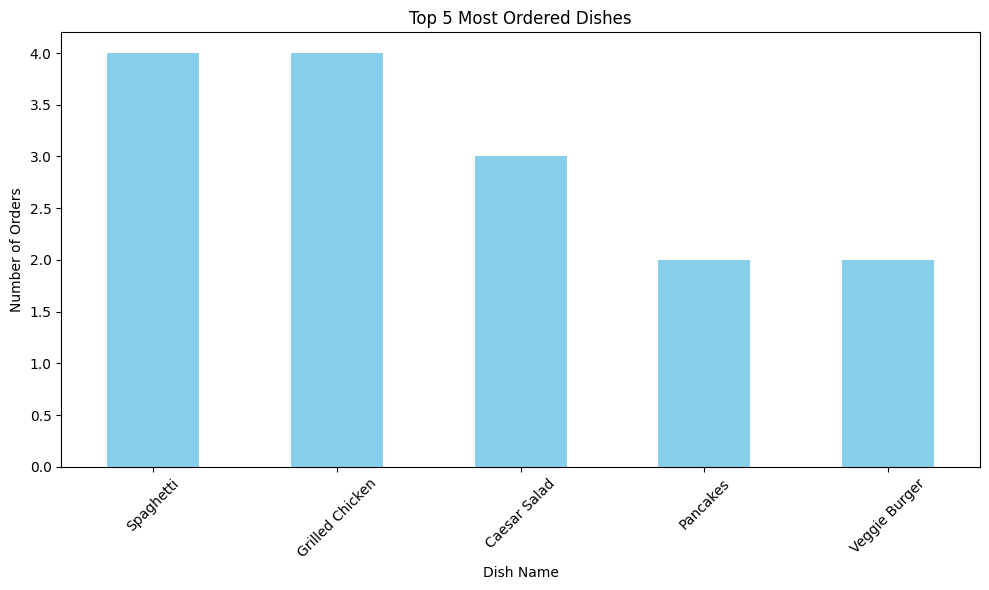

In [18]:
# Visualizations
# 1. Bar Chart: Top 5 Most Ordered Dishes
plt.figure(figsize=(10, 6))
popular_dishes.plot(kind='bar', color='skyblue')
plt.title('Top 5 Most Ordered Dishes')
plt.xlabel('Dish Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('popular_dishes.png')
plt.show()

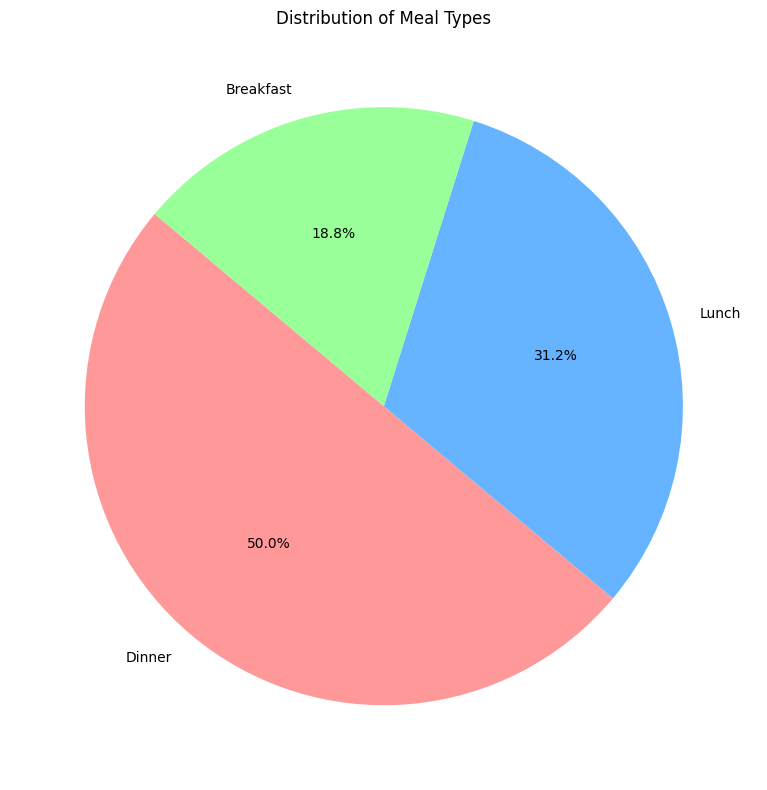

In [19]:
# 2. Pie Chart: Distribution of Meal Types
meal_type_distribution = merged_data['MealType_x'].value_counts()
plt.figure(figsize=(8, 8))
meal_type_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Distribution of Meal Types')
plt.ylabel('')
plt.tight_layout()
plt.savefig('meal_type_distribution.png')
plt.show()

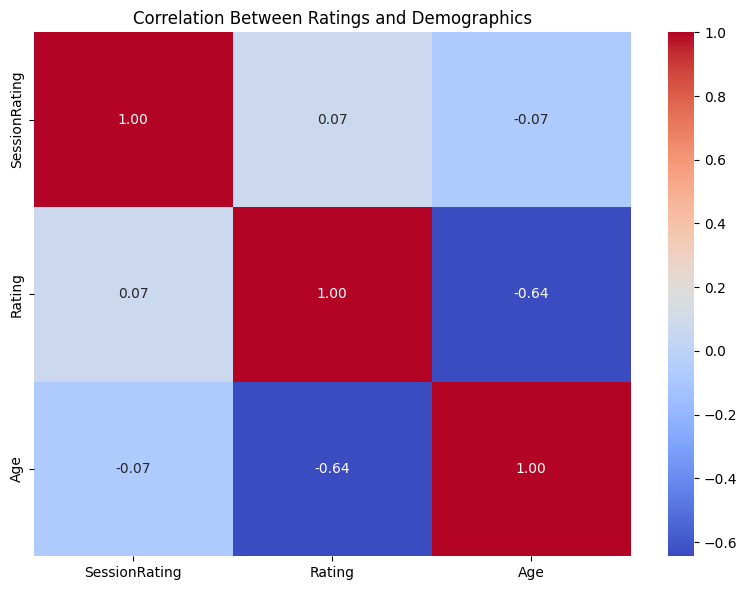

In [20]:
# 3. Heatmap: Correlation Between Ratings and Demographics
correlation_data = merged_data[['SessionRating', 'Rating', 'Age']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Ratings and Demographics')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()

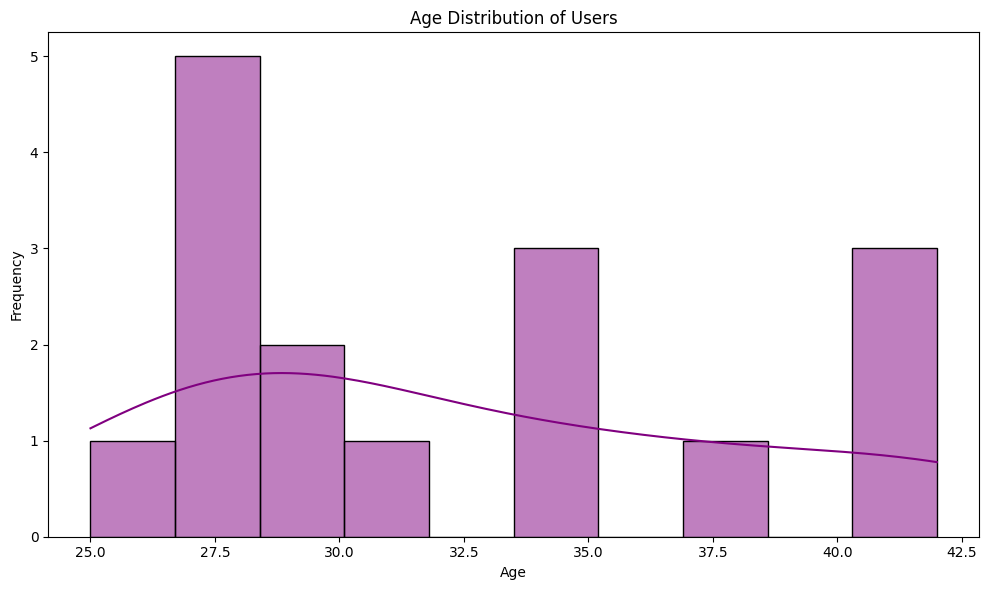

In [21]:
# 4. Histogram: Age Distribution of Users
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['Age'], bins=10, kde=True, color='purple')
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('age_distribution.png')
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


<Figure size 1000x600 with 0 Axes>

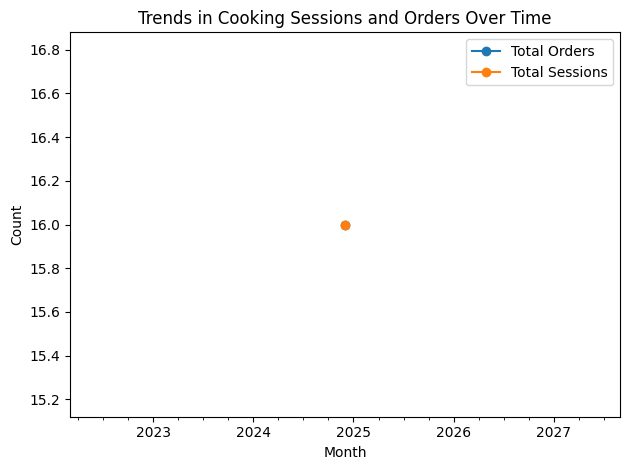

In [22]:
# 5. Line Chart: Trends in Cooking Sessions and Orders Over Time
merged_data['OrderMonth'] = merged_data['OrderDate'].dt.to_period('M')
monthly_trends = merged_data.groupby('OrderMonth').agg({
    'OrderID': 'count',
    'SessionID': 'count'
}).rename(columns={'OrderID': 'TotalOrders', 'SessionID': 'TotalSessions'})

plt.figure(figsize=(10, 6))
monthly_trends.plot(kind='line', marker='o')
plt.title('Trends in Cooking Sessions and Orders Over Time')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(['Total Orders', 'Total Sessions'])
plt.tight_layout()
plt.savefig('monthly_trends.png')
plt.show()